In [ ]:
import time , os
from tensorflow import keras
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
import base64
from io import BytesIO
import random
import numpy as np


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [ ]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = keras.datasets.fashion_mnist.load_data()
X_TEST = X_TEST/255.0
X_TRAIN = X_TRAIN/255.0

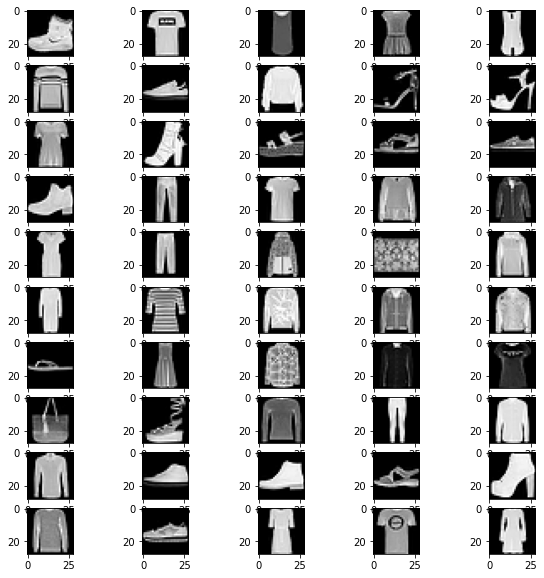

In [ ]:
fig,axe = plt.subplots(10,5,figsize=(10,10))

c=0
for i in range(10):
  for j in range(5):
    axe[i,j].imshow((X_TRAIN[c]),cmap='gray')
    c=c+1


In [ ]:
from os import walk
import warnings
warnings.filterwarnings( "ignore", message = "WARNING", )
def compare_models(mypath,img):
    

    f = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(dirnames)
        break
        
   
    fig,axe = plt.subplots(2,5,figsize=(15,15))
    i = -1
    j=0
    count = 0
    for path in f:
        p ="Models/"+str(path)
        if p== 'Models/dense_0_values_[64, 32, 16]_output_64_epochs_10_':
            print("Trueeeeeeeeee")
        print(p)
        model = keras.models.load_model(p)
        img2 = model.predict(img.reshape(28,28).reshape(-1,28,28,1))[0]
        j = count%5 
        
        if j==0:
            i = i + 1
       
        axe[i,j].imshow(img2.reshape(28,28),cmap='gray')
        count = count + 1
        

In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,UpSampling2D,Input
from keras import Model

In [ ]:
Names = []
Models = []

In [ ]:
logdir = 'logs'
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
%tensorboard — logdir logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2021-07-02 16:47:25.856443: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: tensorboard [-h] [--helpfull] {serve,dev} ...
tensorboard: error: invalid choice: '—' (choose from 'serve', 'dev')

In [ ]:
#Conv layer


def Conv_Autoencoder(x_train,y_train,conv=1,shape_x=28, shape_y=28, conv_values = [], channel=1, filter_size=(3,3), pool_size=(2,2),epochs= 5,batch_size = 128,decay=1e-6):
    
    encoder_input = Input(shape=(shape_x,shape_y, channel))
    #conv_layers = []
    layers = []
    shape = shape_x


   

    for i in range(conv):
      
        
        shape = int(shape/2) # output of every new Conv would be 1/2 of prev by default
        
        if i == 0:
            layer = Conv2D(shape,filter_size,activation='relu',padding='same')(encoder_input)
        
        else:
            layer = Conv2D(shape,filter_size,activation='relu',padding='same')(layer)
        
        layer = MaxPool2D(pool_size = pool_size,padding='same')(layer)
     
        
    
    encoded = layer # last layer
    encoder = Model(encoder_input, encoded)
  
    for i in range(conv):
        
        if i == 0:
            layer = Conv2D(shape,filter_size,activation = 'relu',padding='same')(encoded)
        else:
            layer = Conv2D(shape,filter_size,activation = 'relu',padding='same')(layer)
        
        layer = UpSampling2D(pool_size)(layer)
        shape = shape * 2
        
    
    decoded = Conv2D(1, filter_size, activation = 'relu' ,padding='same')(layer)
    # ????
    autoencoder = Model(encoder_input,decoded)
    
    optimizer = keras.optimizers.SGD(learning_rate=0.0008,momentum=0.999)  #.Adam(decay=decay,learning_rate=0.001)
    autoencoder.compile( optimizer = optimizer , loss='mse',      )#loss = 'binary_crossentropy' )
    
    print(autoencoder.summary())
    
    
    name = "Models/FasionCNN_MODELS_epochs_{}_channel_{}_covlayer_{}_batch_size_{}_decay{}_".format(epochs,channel,conv,batch_size,decay)
    
    autoencoder.fit(x_train,y_train,epochs=epochs,batch_size = batch_size)
    
    autoencoder.save(name)
    Models.append(autoencoder)
    Names.append(name)
    return autoencoder
        
        
        

In [ ]:
x = X_TRAIN#.reshape((len(X_TRAIN),28,28, 1))*
model = Conv_Autoencoder(x,x,conv=1,epochs=100)

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 14)        1778      
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 28, 28, 14)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 1)         127       
Total params: 2,045
Trainable params: 2,045
Non-trainable params: 0
________________________________________________________

['Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_2_batch_size_128_decay1e-06_', 'Models/FasionCNN_MODELS_epochs_100_channel_1_covlayer_1_batch_size_128_decay1e-06_']
4
0 Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_ dict_keys([])
Error :  0
1 Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_ dict_keys(['loss'])
2 Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_2_batch_size_128_decay1e-06_ dict_keys([])
Error :  2
3 Models/FasionCNN_MODELS_epochs_100_channel_1_covlayer_1_batch_size_128_decay1e-06_ dict_keys(['loss'])


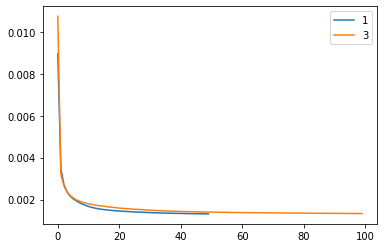

In [ ]:
count = 0
lig = []
print(Names)
print(len(Models))
for models in Models:
  
  print(count,Names[count],models.history.history.keys())
  try:
    loss = models.history.history['loss']
    ep = models.history.epoch
    lig.append(count)
    
    plt.plot(ep,loss)
  except:
    print("Error : ",count)
    pass
  count = count + 1
plt.legend(lig)
#model.history.epoch

KeyError: ignored

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


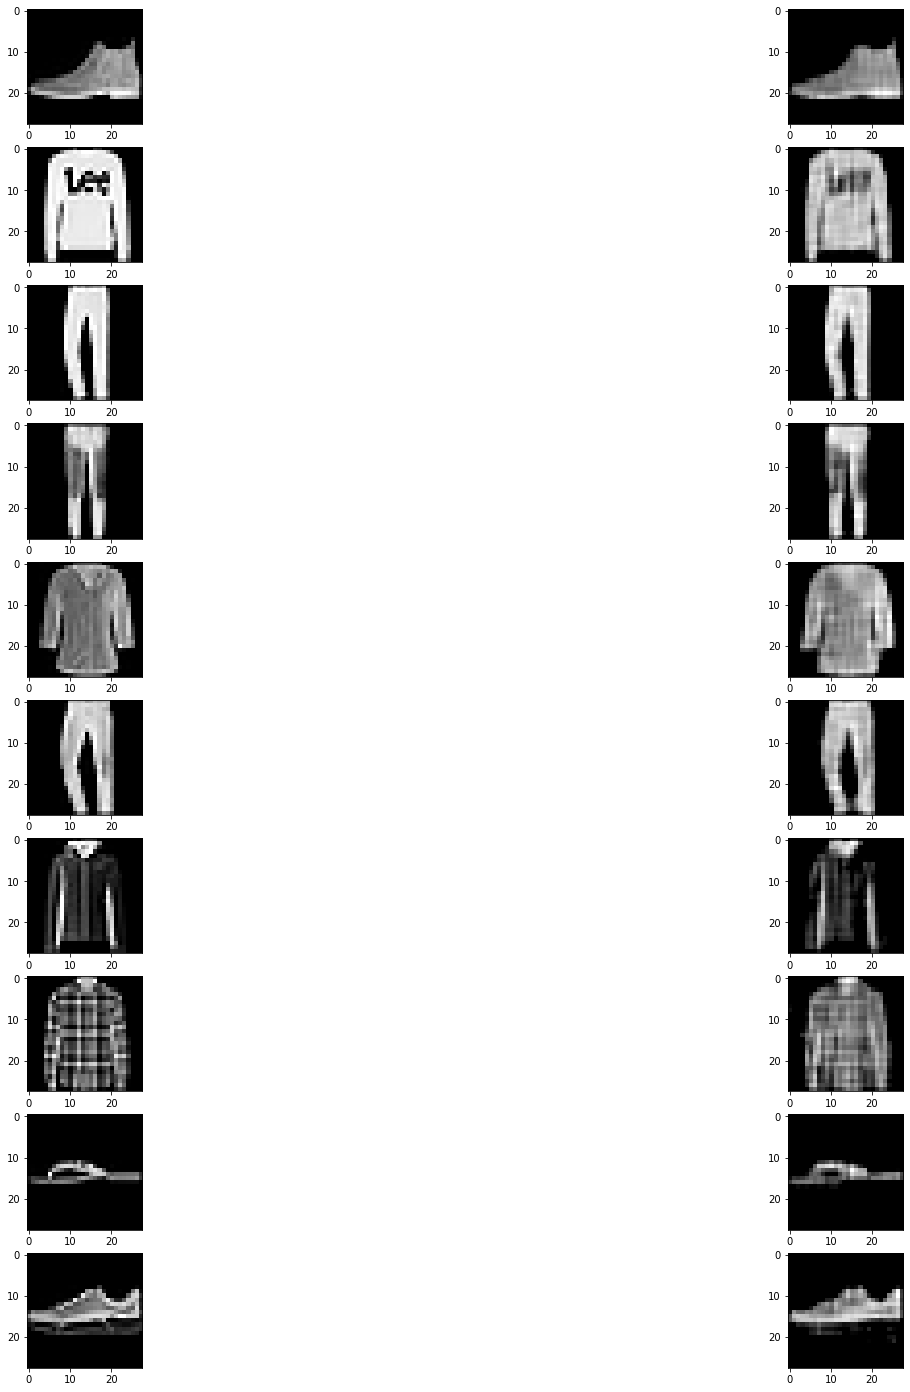

In [ ]:
# MODEL RESULTS
rows = 10
fig,axs = plt.subplots(rows,2,figsize=(25,25))

for i in range(len(X_TEST[:rows])):
    
    values = X_TEST[i]
    
    axs[i,0].imshow(values,cmap='gray')
    img = model.predict(values.reshape(-1,28,28,1))[0]
    print(img.shape)
    axs[i,1].imshow(img.reshape(28,28),cmap='gray')
    
   
    

Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_2_batch_size_128_decay1e-06_
Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_


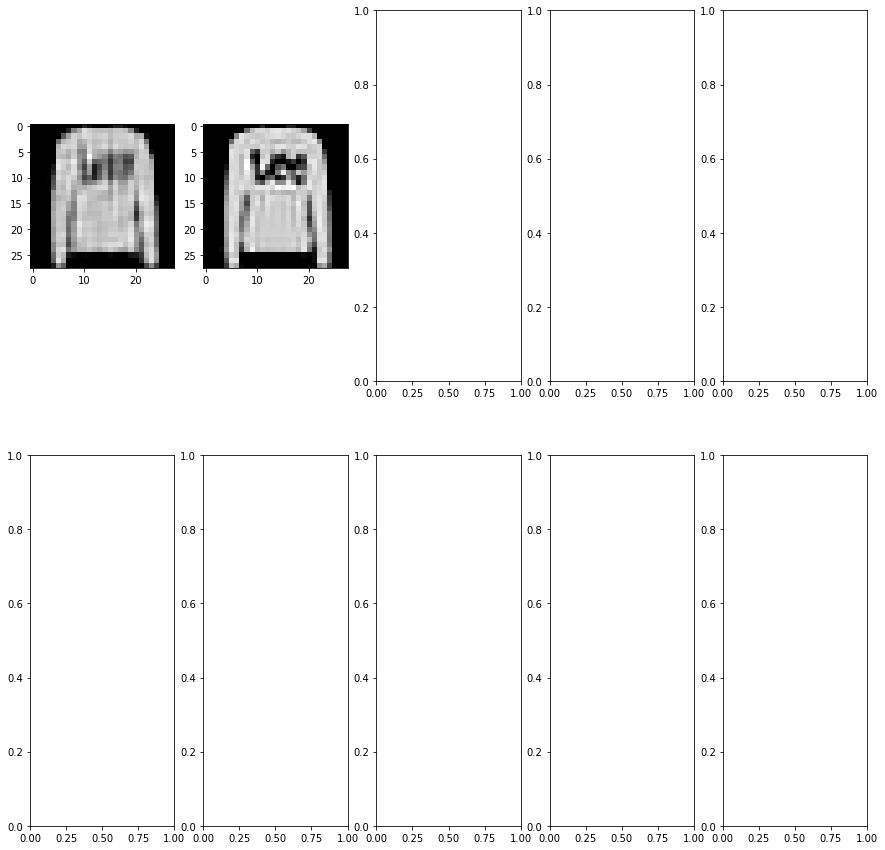

In [ ]:
values = X_TEST[1]
compare_models(r"/content/Models",values)